# 파이썬 이미지 데이터 처리 기본


## glob, os.path
파일의 이름을 얻어올때 glob.glob 사용  
os.path 를 사용하면 os filesystem의 정보를 핸들링

In [3]:
import glob

In [4]:
glob.glob('*.jpg')

['cat.jpg', 'dog.jpg', 'flower.jpg']

## PIL(Python Imaging Library)
pillow를 사용하면 파이썬에서 이미지를 핸들링 가능하다.  
  
가장 중요한 클래스는 이미지를 표현하는 Image 클래스  
- open 메서드는 기존 이미지 파일을 열 때 사용한다.
- new 메서드는 새로운 이미지 파일을 생성할 때 사용하며,
- save 메서드는 이미지 파일을 저장할 때 사용한다.  


https://pillow.readthedocs.io/en/stable/

In [5]:
from PIL import Image

In [6]:
x = Image.open('images/flower.jpg')


In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

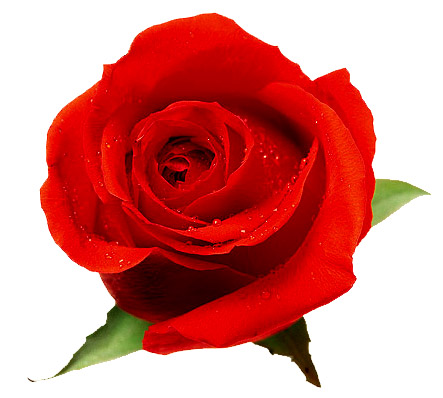

In [8]:
x

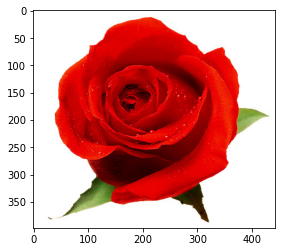

In [9]:
plt.imshow(x)

In [10]:
type(x)
x.size

(443, 398)

사진 이미지의 url로 open하는 것도 가능하다.

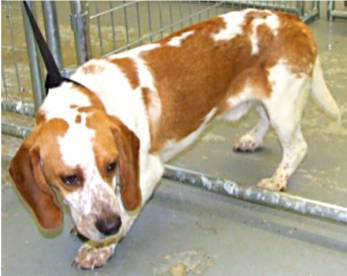

In [11]:
from urllib.request import urlopen
from PIL import Image

url = 'https://github.com/aonekoda/DL-PyTorch/blob/master/02CNN/Cat_Dog_data/test/dog/dog.132.jpg?raw=true'
img = Image.open(urlopen(url))
img.save('dog.jpg')  # 사진은 현재 디렉토리에 저장하기
img


Image 클래스 객체를 NumPy 배열로 변환할 때는 `np.array` 함수를 사용한다.  
NumPy 배열을 Image 객체로 바꿀 때는 `fromarray` 클래스 메서드를 사용  
이미지의 크기를 확대 또는 축소하려면 `resize` 메서드를 사용한다.  
이미지를 회전하기 위해서는 Image객체에서 `rotate` 메서드를 호출한다.  
`crop()` 메서드를 사용하면 이미지에서 우리가 관심이 있는 특정 부분, 좌-상의 좌표, 우-하의 좌표를 받는다


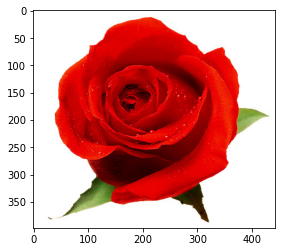

In [12]:
import numpy as np

x_np = np.array(x)
plt.imshow(x_np)

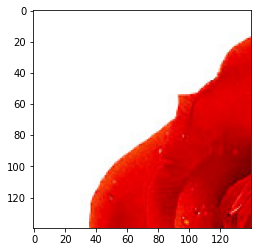

In [13]:
# 원본 파일의 특정 영역을 잘라낸다.
x_crop = x.crop((10, 10, 150, 150))
plt.imshow(x_crop)

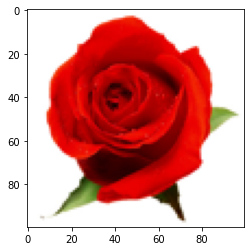

In [14]:
# 원본 파일의 사이즈를 조정한다.

x_resize = x.resize((100,100))
plt.imshow(x_resize)

### 실습하기
- 이미지를 90도 회전해 보자
- 이미지를 (224, 224) 크기로 resize해 보자.

In [15]:
# TO DO
# 실습 코드를 여기에 작성해 보시오.

## sckit-image
`scikit-image` 패키지도 이미지 처리에 많이 사용된다.  
data라는 모듈을 통해 샘플 이미지 데이터를 제공한다. 이미지는 `NumPy 배열` 자료형  
이미지를 읽고 쓸 때는 `io` 서브패키지의 `imsave`, `imread` 명령을 사용한다.   

https://scikit-image.org/

In [16]:
import skimage
import skimage.data

In [17]:
skimage.__version__

'0.16.2'

https://scikit-image.org/docs/dev/api/skimage.data.html  

위 링크에서 사용가능한 샘플 이미지 데이터 리스트 확인 가능.

In [18]:
img_astro = skimage.data.astronaut()

In [19]:
img_astro.shape

(512, 512, 3)

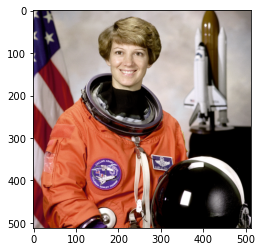

In [20]:
plt.imshow(img_astro)

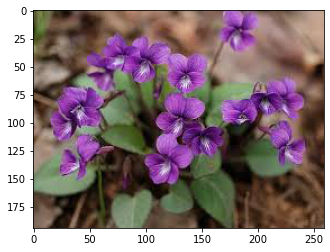

In [21]:
img = skimage.io.imread('flower.jpg')
plt.imshow(img)

### 색공간 변환
Scikit-Image는 그레이스케일, RGB, HSV 등의 색공간을 변환하는 기능을 color 서브패키지에서 제공한다.

* 그레이스케일  
    그레이스케일에서는 모든 색이 흑백이다. 각 픽셀은 명도를 나타내는 숫자로 표현된다. 0은 검은색을 나타내고 숫자가 커질수록 명도가 증가하여 하얀색이 된다. 숫자는 보통 0~255의 8비트 부호없는 정수로 저장된다.
* RGB  
    RGB 색공간에서 색은 적(Red), 녹(Green), 청(Blue)의 3가지 색의 명도를 뜻하는 숫자 3개가 합쳐진 벡터로 표현된다. 8비트 부호없는 정수를 사용하는 경우 (255, 0, 0)은 빨간색, (0, 255, 0)은 녹색, (0, 0, 255)는 파란색이다.

    픽셀 데이터가 스칼라가 아닌 벡터이므로 이미지 데이터는 (세로픽셀수 x 가로픽셀수) 형태의 2차원 배열로 표현하지 못하고 (세로픽셀수 x 가로픽셀수 x 색채널) 형태의 3차원 배열로 저장한다. 세번째 축을 색채널(channel)이라고 부른다.
* HSV  
    Hue(색조), Saturation(채도), Value(명도), 3가지 성분의 조합으로 이미지를 표현한다.

    * 색상(Hue): 색상을 나타낸다. 0부터 360까지의 값을 가진다. 0은 완벽한 빨강이며, 무지개색 순서대로 증가하다가 360에 도달하면 다시 빨강이 된다.
    * 채도(Saturation): 채도. 0부터 100까지의 값을 가진다.0은 가장 탁한(하얀/회색) 색상이며, 100일수록 가장 채도가 높은 색상이다.
    * 명도(Value): 명도이다. 0부터 100까지의 값을 가진다. 0은 가장 어두운(검은) 색상이며, 100일수록 가장 명확한 색상이다.
* HSV를 사용하는 이유
    *  RGB 이미지에서 색 정보를 검출하기 위해서는 R, G, B 세가지 속성을 모두 참고해야한다.
    * 하지만 HSV 이미지에서는 H(Hue)가 일정한 범위를 갖는 순수한 색 정보를 가지고 있기 때문에 RGB 이미지보다 쉽게 색을 분류할 수 있다.

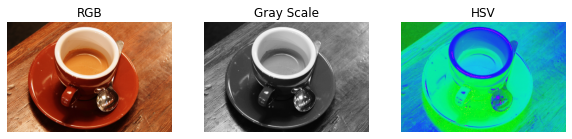

In [22]:
from skimage import color

rgb_img = skimage.data.coffee()
plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(rgb_img)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(color.rgb2gray(rgb_img), cmap=plt.cm.gray)
plt.axis("off")
plt.title("Gray Scale")

plt.subplot(133)
plt.imshow(color.rgb2hsv(rgb_img))
plt.axis("off")
plt.title("HSV")

plt.show()

### HSV image 처리하기
먼저 RGB 이미지를로드하고 색상(hue)과 명도(value) 채널을 추출한다.

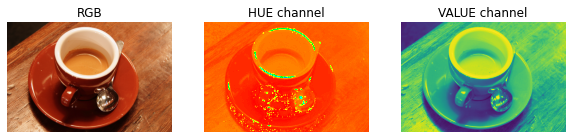

In [23]:
rgb_img = skimage.data.coffee()
hsv_img = color.rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 0]
value_img = hsv_img[:, :, 2]

plt.figure(figsize=(10,10))

plt.subplot(131)
plt.imshow(rgb_img)
plt.axis("off")
plt.title("RGB")

plt.subplot(132)
plt.imshow(hue_img, cmap='hsv')
plt.axis("off")
plt.title("HUE channel")

plt.subplot(133)
plt.imshow(value_img)
plt.axis("off")
plt.title("VALUE channel")
plt.show()

### Threshold를 사용해 배경과 분리

 Hue 채널에서 임계 값을 설정하여 컵을 배경과 분리한다.

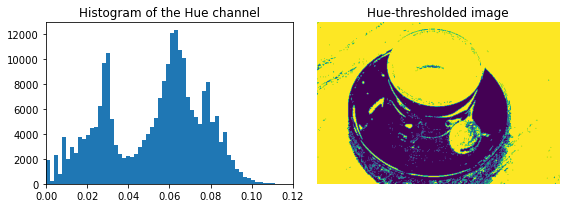

In [24]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 3))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel")

hue_threshold = 0.04   #  Hue 채널에서 임계 값을 설정하여 컵을 배경과 분리
binary_img = hue_img > hue_threshold

ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

### 참고

* https://scikit-image.org/docs/dev/auto_examples/